In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('~/Downloads/heart.csv.xls')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
for name in ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    del df[name]

df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0
3,48,138,214,108,1.5,1
4,54,150,195,122,0.0,0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.transform(df)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
pca.fit(scaled)
scaled_pca = pca.transform(scaled)

In [28]:
scaled.shape

(918, 6)

In [29]:
scaled_pca.shape

(918, 2)

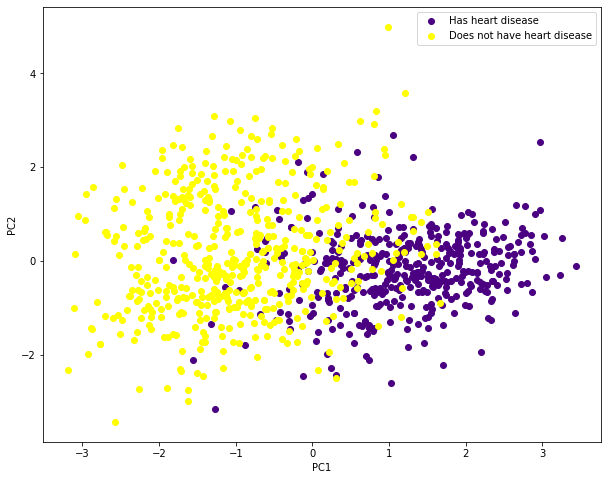

In [34]:
plt.figure(figsize=(10,8))
legend = df['HeartDisease']
colors = {0: '#4B0082', 1:'#FFFF00'}
labels = {0:'Has heart disease', 1:'Does not have heart disease'}

for t in np.unique(legend):
    ix = np.where(legend == t)
    plt.scatter(scaled_pca[ix, 0], scaled_pca[ix, 1], c=colors[t], label=labels[t])
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()